100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.08s/it]


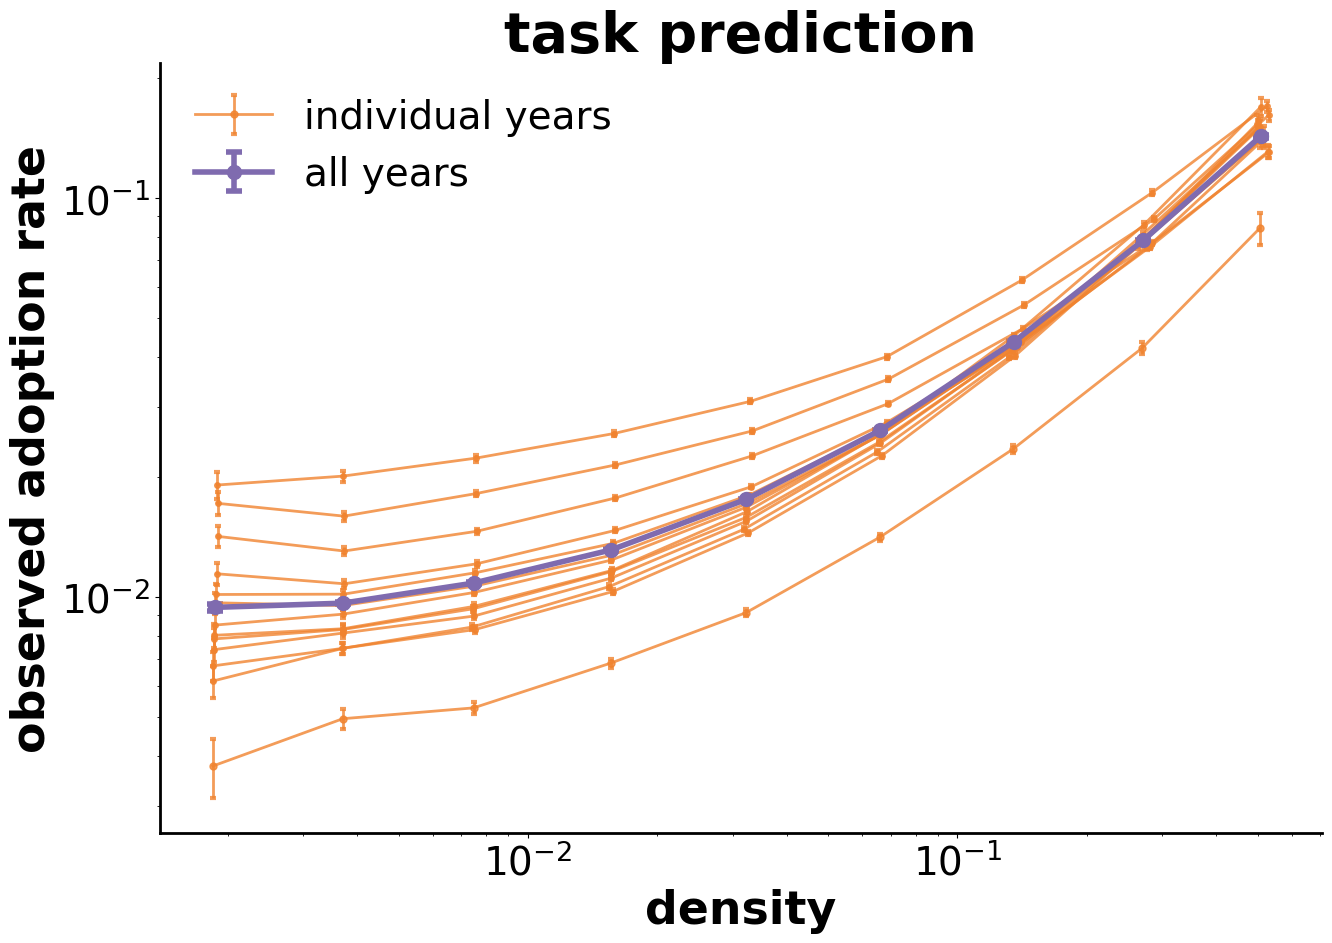

In [1]:
from scipy.stats import binned_statistic
from pickle_file import load_obj, save_obj
from tqdm import tqdm
import pandas as pd
import numpy as np

data_path = 'data_processing/data_files/task_space_data/'
data_path_save = data_path + 'obj_tag_question_bipartite_core_space/'

import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
import matplotlib.font_manager

shanghai_metro_color_23 = ['#EA0437', '#87D300', '#FFD100', '#4F1F91', '#A24CC8', '#FF7200', '#009EDB', '#78C7EB', '#BC87E6', '#7C2230', '#007B63', '#D71671', '#F293D1', '#7F7800', '#BBA786', '#32D4CB', '#B67770', '#D6A461', '#DFC765', '#666666', '#999999', '#009090', '#666666']

cp_allyear = []
bin_number = [15]

for yr in tqdm(range(2011, 2023)):
    for level in range(1,2):

        cp_all = load_obj(f'cp_all_year_{yr}_level_{level}', data_path_save + 'density_prediction/')

        x_data = [cp[0] for cp in cp_all if cp[0] > 0]
        y_data = [cp[1] for cp in cp_all if cp[0] > 0]

        import numpy as np
        data_list = x_data

        if (min(data_list)==0):
            data_log_min = 0
        else:
            data_log_min = np.log10(min(data_list))

        data_log_space = np.logspace(data_log_min, np.log10(max(data_list)), 10, base=10)

    

        bin_centers, _, _ = binned_statistic(x_data, x_data, statistic='mean', bins=data_log_space)
        bin_averages, _, _ = binned_statistic(x_data, y_data, statistic='mean', bins=data_log_space)
        bin_count, _, _ = binned_statistic(x_data, y_data, statistic='count', bins=data_log_space)
        #bin_std, _, _ = binned_statistic(x_data, y_data, statistic='std', bins=data_log_space)

        error_bar_y = np.sqrt(bin_averages * (1 - bin_averages))/np.sqrt(bin_count) * 1.96

        #plt.errorbar( bin_centers , bin_averages ,yerr=error_bar_y, fmt='-o',ms = 7, lw = 3, capsize = 2, label = f'the {level_name[level-1]}-level skills')
        #plt.plot( bin_centers , bin_averages ,'-', lw=3,c = '#871918', alpha = 0.3)
        plt.errorbar( bin_centers , bin_averages ,yerr=error_bar_y, fmt='-o',ms = 4, lw = 2, capsize = 2, capthick=3,alpha = 0.8,c =  '#f0832f' )
        cp_allyear += [cp for cp in cp_all]
        del cp_all
        
for yr in tqdm(range(2023, 2024)):
    for level in range(1,2):

        cp_all = load_obj(f'cp_all_year_{yr}_level_{level}', data_path_save + 'density_prediction/')

        x_data = [cp[0] for cp in cp_all if cp[0] > 0]
        y_data = [cp[1] for cp in cp_all if cp[0] > 0]

        import numpy as np
        data_list = x_data
        if (min(data_list)==0):
            data_log_min = 0
        else:
            data_log_min = np.log10(min(data_list))

        data_log_space = np.logspace(data_log_min, np.log10(max(data_list)), 10, base=10)
        
        bin_centers, _, _ = binned_statistic(x_data, x_data, statistic='mean', bins=data_log_space)
        bin_averages, _, _ = binned_statistic(x_data, y_data, statistic='mean', bins=data_log_space)
        bin_count, _, _ = binned_statistic(x_data, y_data, statistic='count', bins=data_log_space)

        error_bar_y = np.sqrt(bin_averages * (1 - bin_averages))/np.sqrt(bin_count) * 1.96

        #plt.errorbar( bin_centers , bin_averages ,yerr=error_bar_y, fmt='-o',ms = 7, lw = 3, capsize = 2, label = f'the {level_name[level-1]}-level skills')
        plt.errorbar( bin_centers , bin_averages ,yerr=error_bar_y, fmt='-o',ms = 5, lw = 2, capsize = 2, capthick=3,alpha = 0.8, c =  '#f0832f' , label = 'individual years')
        #plt.plot( bin_centers , bin_averages ,'-', lw=3,c =  '#871918', alpha = 0.3, label = 'individual years')
        cp_allyear += [cp for cp in cp_all]
        del cp_all
        

x_data = [cp[0] for cp in cp_allyear if cp[0] > 0]
y_data = [cp[1] for cp in cp_allyear if cp[0] > 0]

if (min(data_list)==0):
    data_log_min = 0
else:
    data_log_min = np.log10(min(data_list))

data_log_space = np.logspace(data_log_min, np.log10(max(data_list)), 10, base=10)

bin_centers, _, _ = binned_statistic(x_data, x_data, statistic='mean', bins=data_log_space)
bin_averages, _, _ = binned_statistic(x_data, y_data, statistic='mean', bins=data_log_space)
bin_count, _, _ = binned_statistic(x_data, y_data, statistic='count', bins=data_log_space)
bin_std, _, _ = binned_statistic(x_data, y_data, statistic='std', bins=data_log_space)
    
error_bar_y =bin_std/np.sqrt(bin_count) * 1.96

plt.errorbar( bin_centers , bin_averages ,yerr=error_bar_y, fmt='-o',ms = 10, lw = 4, capsize = 6, capthick=4, c =  '#7f6baf', label = 'all years')

del cp_allyear

x_label_name = 'density'
y_label_name = 'observed adoption rate'

plt.xlabel(x_label_name,fontsize=33, weight = 'bold')
plt.ylabel(y_label_name,fontsize=33, weight = 'bold')
plt.title('task prediction', fontsize=40, weight = 'bold')
# ####设置坐标刻度值的大小以及刻度值的字体
plt.tick_params(labelsize=28)
plt.rc('font', weight='bold')
#plt.legend()
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
ax=plt.gca();#获得坐标轴的句柄
ax.spines['bottom'].set_linewidth(2);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(2);####设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(0);###设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(0);####设置上部坐标轴的粗细
ax.set_xscale('log')
ax.set_yscale('log')
#plt.ylim([0,0.12])

#plt.xticks(np.arange(0,24,1))
# 设置 X 轴的网格线，风格为 点画线
#plt.grid(axis='x',linestyle='-.')

font1 = {
        'weight' : 'normal',
        'size'   : 28,
}
legend = plt.legend(prop=font1, frameon = False)

#plt.savefig('figure3b.svg', format = 'svg', transparent = True)
plt.show()